In [287]:
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt


In [288]:
#Reading the csv file
df=pd.read_csv('WA_Fn-UseC_-Telco-Customer-Churn.csv')

In [289]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [290]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


In [291]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

From the analysis above two things can be noted:
1)The column for TotalCharges is of "object" type, this needs to be change to float64 data type
2) Most service rows havre some entry of "No" and "No Phone service" type, this all needs to be changed to "No"

In [ ]:
#investigating this further by extracting the first 490 rows

In [27]:
df.head(490) #wanted to see the first 490 rows for missing values on the Total charge column

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
485,7971-HLVXI,Male,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,No,No,No,Yes,Two year,Yes,Credit card (automatic),84.50,6130.85,No
486,9094-AZPHK,Female,0,No,No,15,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.15,1415,No
487,3649-JPUGY,Male,0,No,No,72,Yes,Yes,DSL,No,...,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),88.60,6201.95,No
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No


In [ ]:
# I can see that in row 488, the entry for TotalCharges is empty, 
#this needs further investigation to see if there are more empty rows

In [292]:
#The below cold will extract all empty entries in the TotalCharge column
df.loc[df['TotalCharges'].str.contains(" ")]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.25,,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.75,,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No phone service,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.85,,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.35,,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,20.00,,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,19.70,,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,,No


In [ ]:
#I can see that 11 rows have empty entry for TotalCharges and the corresponding entry for tenure are zeros.
# I will copy the entry from tenure to the entry for TotalCharges to make the entry for TotalCharges 0 for 0 tenure.
# I will use the row index of each row to do the copying.

In [36]:
#The syntax for copying  generate warnings,i used the set_option method to  turn off  SettingWithCopyWarning
pd.set_option('mode.chained_assignment', None)

df.TotalCharges[488]=df.tenure[488]
df.TotalCharges[753]=df.tenure[753]
df.TotalCharges[936]=df.tenure[936]
df.TotalCharges[1082]=df.tenure[1082]
df.TotalCharges[1340]=df.tenure[1340]
df.TotalCharges[3331]=df.tenure[3331]
df.TotalCharges[3826]=df.tenure[3826]
df.TotalCharges[4380]=df.tenure[4380]
df.TotalCharges[5218]=df.tenure[5218]
df.TotalCharges[6670]=df.tenure[6670]
df.TotalCharges[6754]=df.tenure[6754]

#I should have written a fucntion to automate this but due to time factors, this was not poasible

In [256]:
df.dtypes

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

In [ ]:
#I can see that the column for monthlyCharge has changed to float64 after feeling the empty values.

In [258]:
#The columns for the services have some entries eg "No" and "No Internet Services" we have to change this to "No"
# we run the below comand to change the entry all to No

In [259]:
df = df.replace(['No internet service', ''],'No')# We have have to repeat this to remove "No Phone Service"

In [260]:
df = df.replace(['No phone service', ''],'No')

In [262]:
#we can verify this by calling the below command
df.head(300)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
295,8203-XJZRC,Male,0,No,No,1,Yes,No,No,No,...,No,No,No,No,Month-to-month,No,Mailed check,20.25,20.25,No
296,6556-DBKZF,Female,0,Yes,Yes,71,Yes,No,Fiber optic,No,...,Yes,No,No,No,Two year,No,Electronic check,76.05,5436.45,No
297,6851-WEFYX,Male,1,Yes,No,35,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,100.80,3437.5,No
298,2985-JUUBZ,Male,0,Yes,Yes,40,Yes,Yes,DSL,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.55,3015.75,No


In [263]:
#saving my changes to the original data frame.
df=df

QUESTIONS:

Questions 1 (a)
Which 2 demographics have proven to be the most popular with the telco brand.

The demographic characteristics according to the dataset include :- gender, senior citizen, partner,dependants
 I will determine the popularity of the brand based on the number  of churnings .

In [265]:
#investigating rate of churning amoung males and females
df.groupby(["gender", "Churn"])["Churn"].count()

gender  Churn
Female  No       2549
        Yes       939
Male    No       2625
        Yes       930
Name: Churn, dtype: int64

In [269]:
#The resuts shows that more females have churn the brand than males

In [270]:
#investigating SeniorCitizen and non SeniorCitizen  to determine the popularity of the brand in this demogaphic characteristic
df.groupby(["SeniorCitizen", "Churn"])["Churn"].count()

SeniorCitizen  Churn
0              No       4508
               Yes      1393
1              No        666
               Yes       476
Name: Churn, dtype: int64

In [50]:
#illustrating this on a bar graph

[Text(0.5, 0, 'SeniorCitizen/Churn'), Text(0, 0.5, 'Number of Churns')]

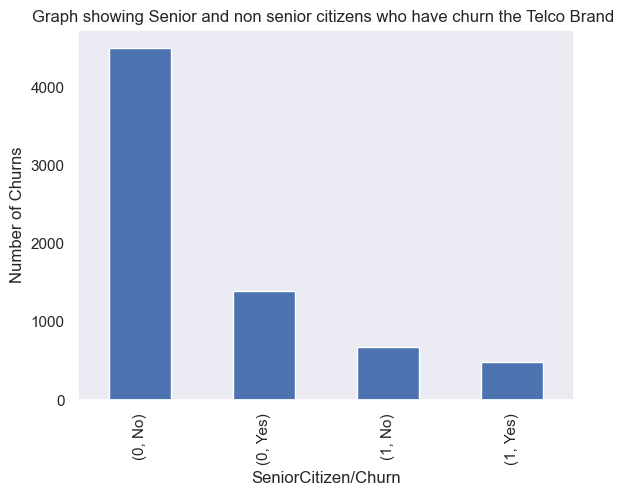

In [271]:
df.groupby(["SeniorCitizen", "Churn"])["Churn"].count().plot(kind='bar', title='Graph showing Senior and non senior citizens who have churn the Telco Brand ').set(xlabel='SeniorCitizen/Churn', ylabel='Number of Churns')

In [51]:
#results shows more non SeniorcItizen subscribe to the brand than Senior Citizen and more senior citizen churned the brand.

Therefore the demographics popular with the brand are Non Senior ctizens and males

1(b) If the marketing team wanted to increase customer retention, to whom should
they target their advertisements to?

Answer: They should target non senior citizens and females

2 (a). Which 3 services are contributing to a higher monthly charge and resulting to
customers churning? (Use visualizations in explaining your analysis)

In [274]:
# I will use seaborn to illustrate the pattern of churning and monthycharge across all services offered by Telco 

In [275]:
sns.set(style = "dark")

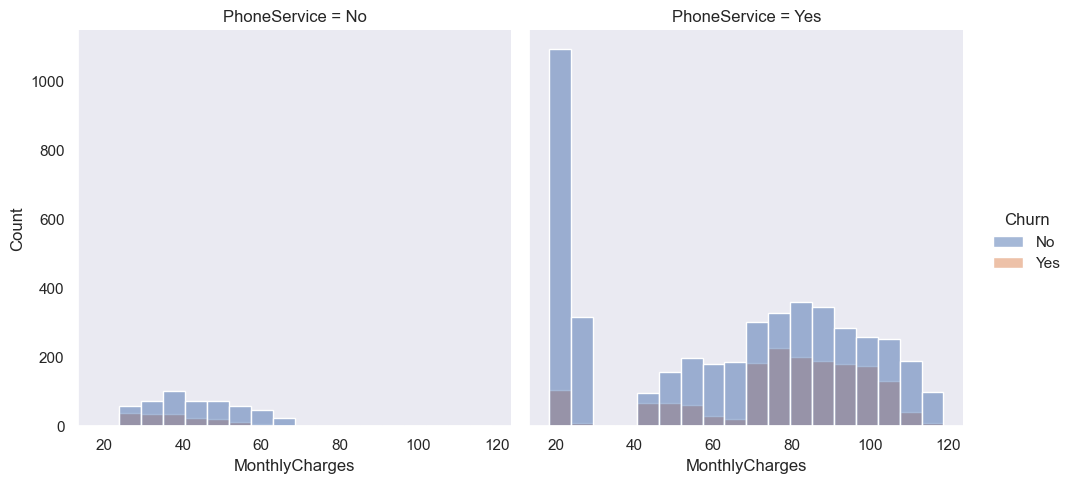

In [276]:
sns.displot(x='MonthlyCharges',data=df, hue='Churn',col='PhoneService')

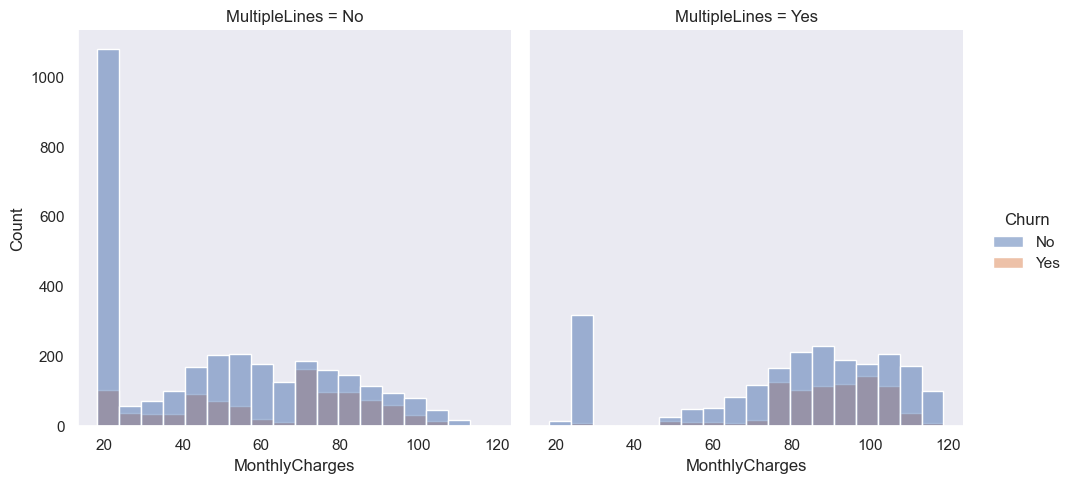

In [277]:
sns.displot(x='MonthlyCharges',data=df, hue='Churn',col='MultipleLines')

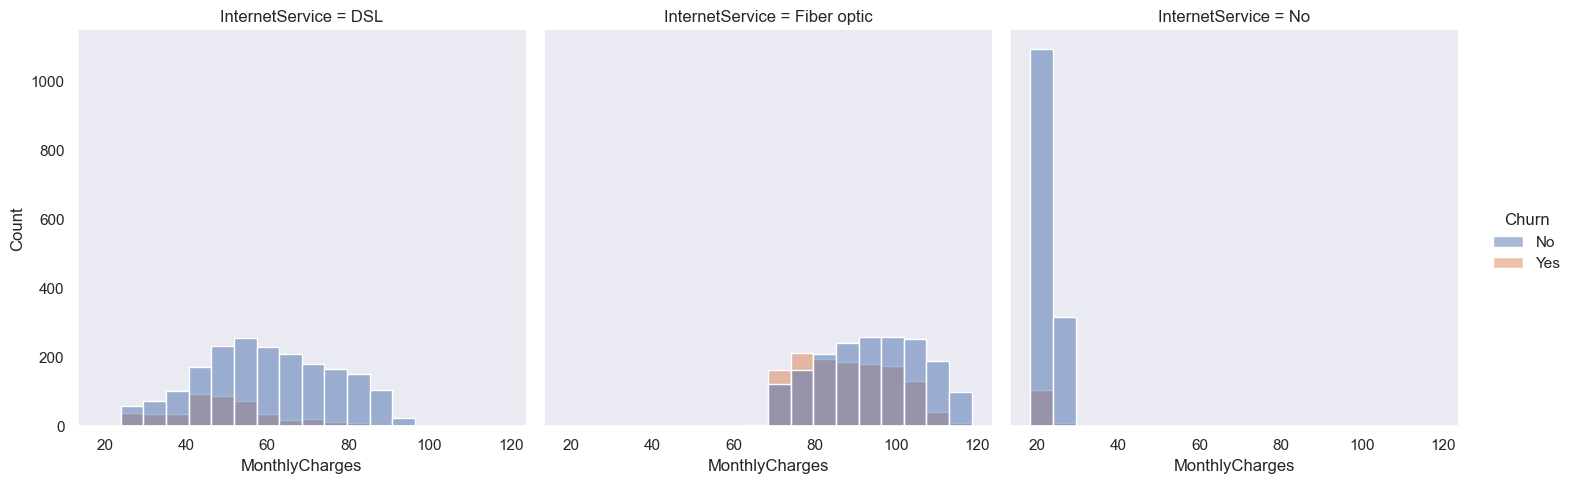

In [278]:
sns.displot(x='MonthlyCharges',data=df, hue='Churn',col='InternetService')

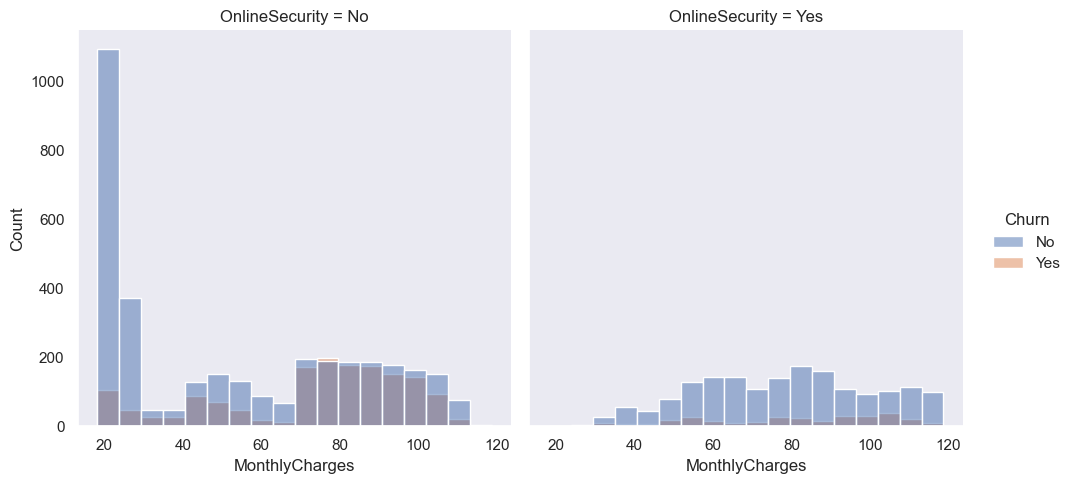

In [170]:
sns.displot(x='MonthlyCharges',data=df, hue='Churn',col='OnlineSecurity')

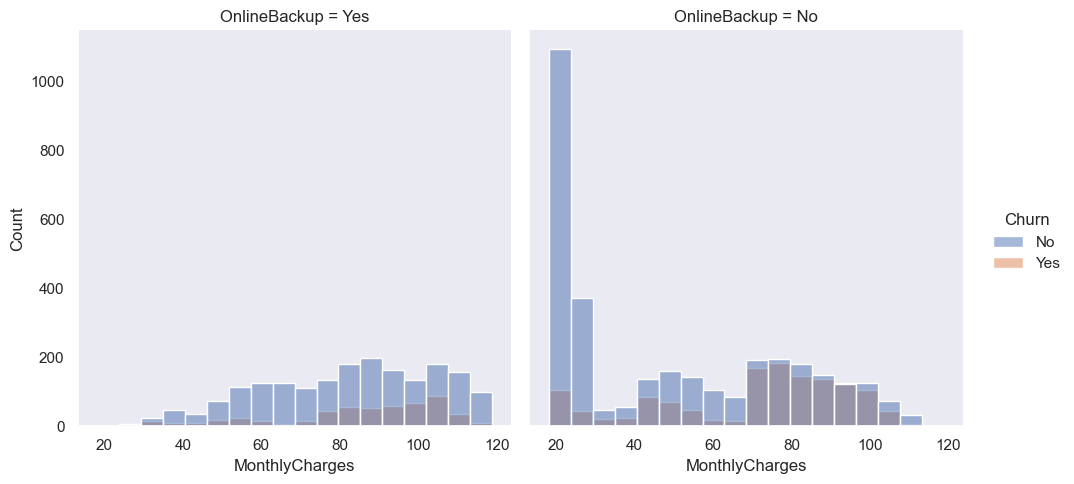

In [171]:
sns.displot(x='MonthlyCharges',data=df, hue='Churn',col='OnlineBackup')

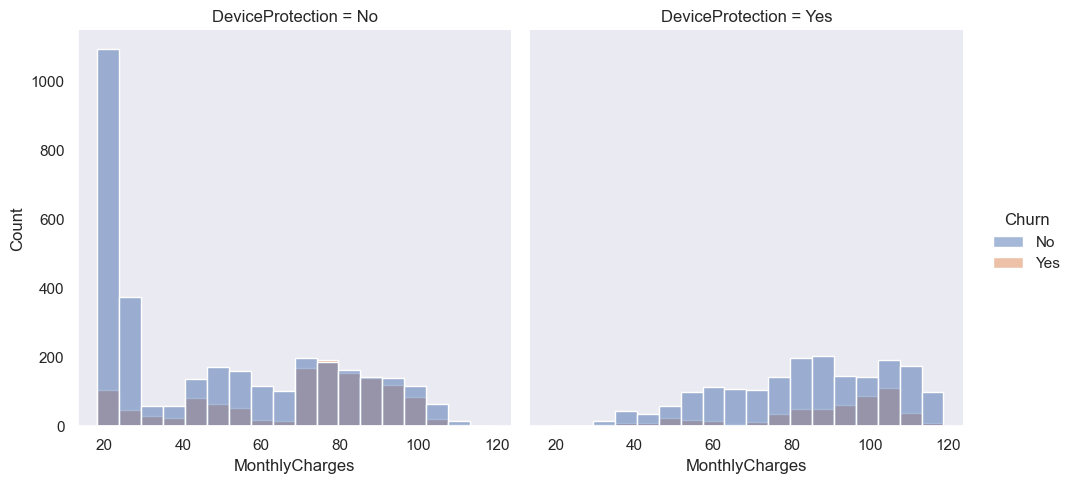

In [279]:
sns.displot(x='MonthlyCharges',data=df, hue='Churn',col='DeviceProtection')

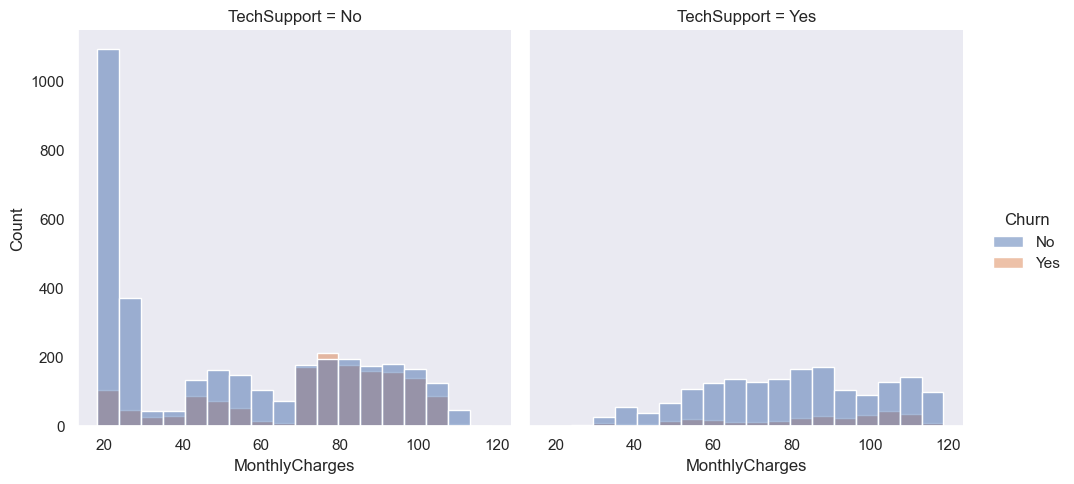

In [280]:
sns.displot(x='MonthlyCharges',data=df, hue='Churn',col='TechSupport')

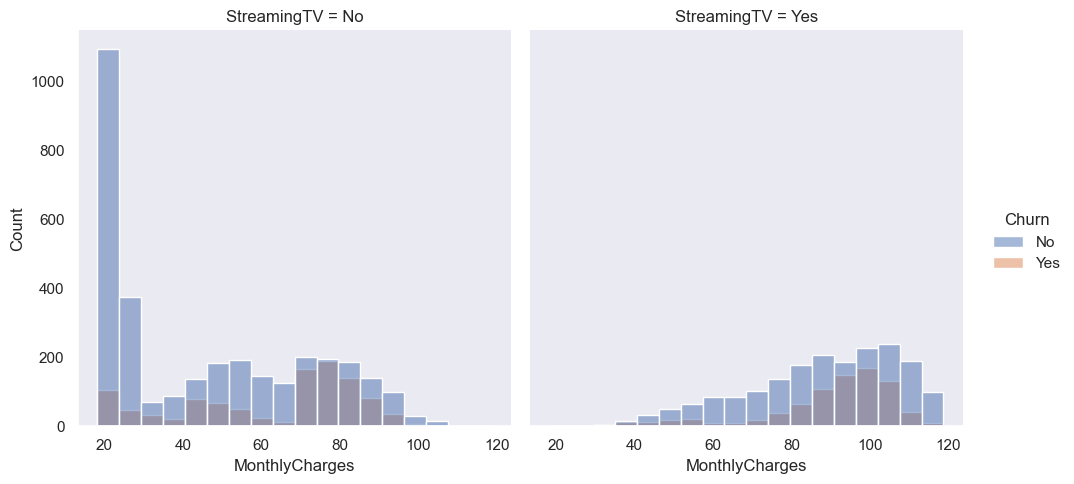

In [281]:
sns.displot(x='MonthlyCharges',data=df, hue='Churn',col='StreamingTV')

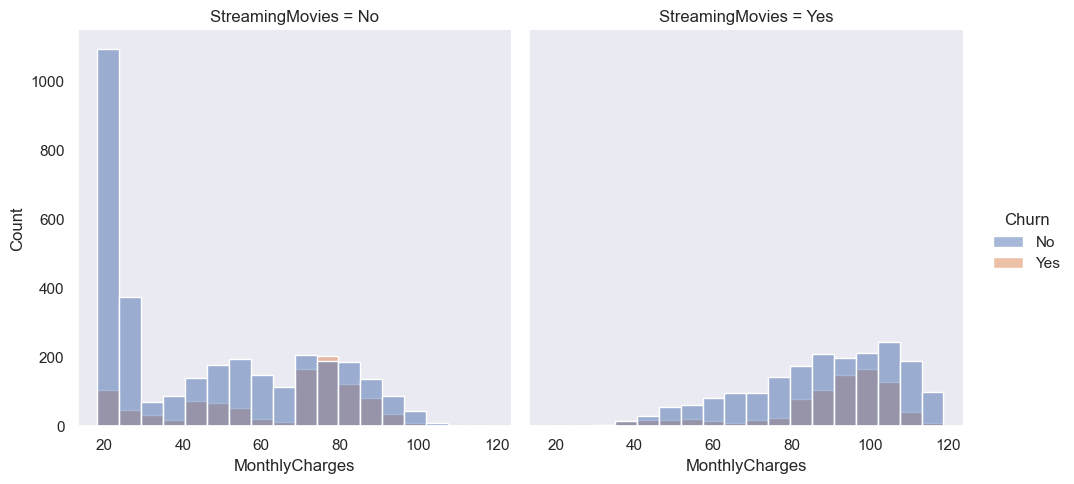

In [175]:
sns.displot(x='MonthlyCharges',data=df, hue='Churn',col='StreamingMovies')

The 3 services are: StreamingMovies, StreamingTV and OnlineBackup


2b. If the telco was to offer Phone as a standalone service, which type of contract
would encourage customer retention?

In [ ]:
#I will group the data by the churn status, phone service status and contract types ,

In [150]:
df.groupby(["Churn", "PhoneService", "Contract"])["Churn"].count()

Churn  PhoneService  Contract      
No     No            Month-to-month     223
                     One year           131
                     Two year           158
       Yes           Month-to-month    1997
                     One year          1176
                     Two year          1489
Yes    No            Month-to-month     153
                     One year            14
                     Two year             3
       Yes           Month-to-month    1502
                     One year           152
                     Two year            45
Name: Churn, dtype: int64

In [282]:
#Using Visualization we shall view the contract type that encourages retention.

<AxesSubplot:xlabel='Churn,PhoneService,Contract'>

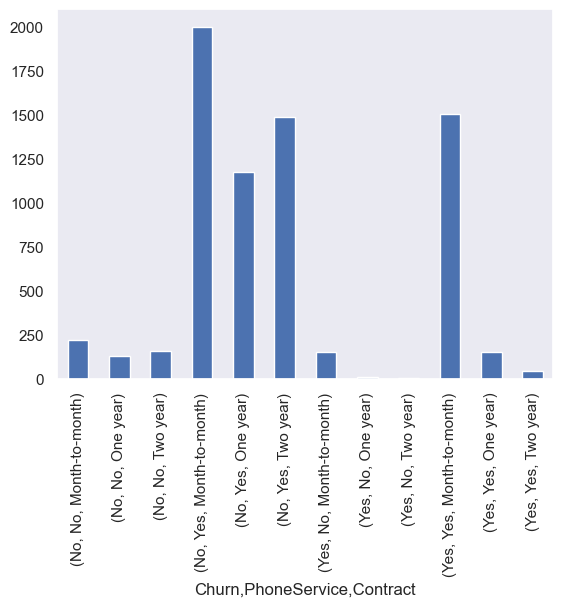

In [283]:
df.groupby(["Churn", "PhoneService", "Contract"])["Churn"].count().plot(kind='bar')

Considering the number of customers who have subscribed for the phone service and have not churn, the contract type is Month_to_Month

3) Payment: (Use visualizations in explaining your analysis)
a. If the company was to streamline all its services into 3 bouquet packages, what
monthly prices will be appropriate for the following packages to keep customers
from churning:
i. Basic
ii. Plus
iii. Premium


#i) The Basic price

In [284]:
# to get the basic price, i will get the minimum price for each service subscribed to by the customers and not churned, 
# Then I will get the average of the minimum prices to get the Basic price.

In [176]:
df.groupby(["PhoneService", "Churn"])["MonthlyCharges"].min()

PhoneService  Churn
No            No       24.15
              Yes      23.45
Yes           No       18.25
              Yes      18.85
Name: MonthlyCharges, dtype: float64

In [194]:
# basic price for phone service customers who have not churned the service
a=18.25

In [177]:
df.groupby(["MultipleLines ", "Churn"])["MonthlyCharges"].min()

MultipleLines   Churn
No              No       18.25
                Yes      18.85
Yes             No       22.95
                Yes      23.15
Name: MonthlyCharges, dtype: float64

In [195]:
# basic price for phone MultipleLines customers who have not churned the service
b=22.95

In [179]:
df.groupby(["InternetService", "Churn"])["MonthlyCharges"].min()

InternetService  Churn
DSL              No       24.15
                 Yes      23.45
Fiber optic      No       68.60
                 Yes      67.75
No               No       18.25
                 Yes      18.85
Name: MonthlyCharges, dtype: float64

In [196]:
# basic price for internetservice  customers who have not churned the service , average of fiber and dsl connection types
c=(68.6+24.15)/2

In [181]:
df.groupby(["OnlineSecurity", "Churn"])["MonthlyCharges"].min()

OnlineSecurity  Churn
No              No       18.25
                Yes      18.85
Yes             No       28.50
                Yes      29.70
Name: MonthlyCharges, dtype: float64

In [197]:
# basic price for OnlineSecurity customers who have not churned the service
d=28.5

In [182]:
df.groupby(["OnlineBackup", "Churn"])["MonthlyCharges"].min()

OnlineBackup  Churn
No            No       18.25
              Yes      18.85
Yes           No       29.15
              Yes      28.45
Name: MonthlyCharges, dtype: float64

In [198]:
# basic price for OnlineBackup customers who have not churned the service
e=29.15

In [183]:
df.groupby(["DeviceProtection", "Churn"])["MonthlyCharges"].min()

DeviceProtection  Churn
No                No       18.25
                  Yes      18.85
Yes               No       29.10
                  Yes      29.40
Name: MonthlyCharges, dtype: float64

In [199]:
# basic price for DeviceProtection customers who have not churned the service
f=29.10

In [184]:
df.groupby(["TechSupport", "Churn"])["MonthlyCharges"].min()

TechSupport  Churn
No           No       18.25
             Yes      18.85
Yes          No       29.05
             Yes      28.60
Name: MonthlyCharges, dtype: float64

In [200]:
# basic price for TechSupport customers who have not churned the service
g=29.05

In [185]:
df.groupby(["StreamingTV", "Churn"])["MonthlyCharges"].min()

StreamingTV  Churn
No           No       18.25
             Yes      18.85
Yes          No       33.75
             Yes      34.00
Name: MonthlyCharges, dtype: float64

In [201]:
# basic price for StreamingTV customers who have not churned the service
h=33.75

In [186]:
df.groupby(["StreamingMovies", "Churn"])["MonthlyCharges"].min()

StreamingMovies  Churn
No               No       18.25
                 Yes      18.85
Yes              No       34.20
                 Yes      33.90
Name: MonthlyCharges, dtype: float64

In [202]:
# basic price for StreamingMovies customers who have not churned the service
i=34.20

In [204]:
#the basic price will be the average of the minimum  costs customers were willing to pay for all services
(a+b+c+d+e+f+g+h+i)/9


30.147222222222222

Therefore the basic price is 30.15

ii. Plus price

In [ ]:
# This will be the average of the average price customers where willing to pay for each service without churning the service

In [205]:
df.groupby(["PhoneService", "Churn"])["MonthlyCharges"].mean()

PhoneService  Churn
No            No       43.520996
              Yes      37.533824
Yes           No       63.213857
              Yes      78.134255
Name: MonthlyCharges, dtype: float64

In [285]:
aa=63.21 # The average price for the phone service for customers who didnt churn the service, I will repeat this procedure for all.

In [207]:
df.groupby(["MultipleLines ", "Churn"])["MonthlyCharges"].mean()

MultipleLines   Churn
No              No       48.792794
                Yes      62.237831
Yes             No       79.217987
                Yes      89.071176
Name: MonthlyCharges, dtype: float64

In [208]:
bb=79.2

In [209]:
df.groupby(["InternetService", "Churn"])["MonthlyCharges"].mean()

InternetService  Churn
DSL              No       60.212105
                 Yes      49.083224
Fiber optic      No       93.932379
                 Yes      88.126484
No               No       21.136058
                 Yes      20.368142
Name: MonthlyCharges, dtype: float64

In [211]:
cc=(60+94)/2

In [213]:
df.groupby(["OnlineSecurity", "Churn"])["MonthlyCharges"].mean()

OnlineSecurity  Churn
No              No       52.717928
                Yes      73.103145
Yes             No       78.369432
                Yes      81.581356
Name: MonthlyCharges, dtype: float64

In [214]:
dd=78.369432

In [215]:
df.groupby(["OnlineBackup", "Churn"])["MonthlyCharges"].mean()

OnlineBackup  Churn
No            No       49.001209
              Yes      69.966902
Yes           No       82.292655
              Yes      85.956788
Name: MonthlyCharges, dtype: float64

In [225]:
ee=82.3

In [216]:
df.groupby(["DeviceProtection", "Churn"])["MonthlyCharges"].mean()

DeviceProtection  Churn
No                No       48.414695
                  Yes      68.771790
Yes               No       83.837240
                  Yes      88.214679
Name: MonthlyCharges, dtype: float64

In [217]:
ff=83.8

In [218]:
df.groupby(["TechSupport", "Churn"])["MonthlyCharges"].mean()

TechSupport  Churn
No           No       51.800872
             Yes      72.489673
Yes          No       80.040802
             Yes      84.256290
Name: MonthlyCharges, dtype: float64

In [219]:
gg=80

In [220]:
df.groupby(["StreamingTV", "Churn"])["MonthlyCharges"].mean()

StreamingTV  Churn
No           No       45.851951
             Yes      62.053081
Yes          No       87.979662
             Yes      90.497359
Name: MonthlyCharges, dtype: float64

In [227]:
hh=88

In [221]:
df.groupby(["StreamingMovies", "Churn"])["MonthlyCharges"].mean()

StreamingMovies  Churn
No               No       45.655153
                 Yes      62.383587
Yes              No       87.852638
                 Yes      89.933619
Name: MonthlyCharges, dtype: float64

In [222]:
ii=88

In [228]:
plus_month_price=(aa+bb+cc+dd+ee+ff+gg+hh+ii)/9 

In [229]:
plus_month_price

79.98660355555555

The Plus price will be 79.99 approx 80.

 iii. Premium

In [230]:
#The Premium price will be the average of the maximum price for each service paid by customers who didnt churn the service

In [231]:
df.groupby(["PhoneService", "Churn"])["MonthlyCharges"].max()

PhoneService  Churn
No            No        67.20
              Yes       60.45
Yes           No       118.75
              Yes      118.35
Name: MonthlyCharges, dtype: float64

In [232]:
aaa=119

In [233]:
df.groupby(["MultipleLines ", "Churn"])["MonthlyCharges"].max()

MultipleLines   Churn
No              No       112.20
                Yes      110.10
Yes             No       118.75
                Yes      118.35
Name: MonthlyCharges, dtype: float64

In [234]:
bbb=119

In [235]:
df.groupby(["InternetService", "Churn"])["MonthlyCharges"].max()

InternetService  Churn
DSL              No        94.80
                 Yes       92.45
Fiber optic      No       118.75
                 Yes      118.35
No               No        26.90
                 Yes       25.90
Name: MonthlyCharges, dtype: float64

In [236]:
ccc=(94.8+119)/2

In [237]:
df.groupby(["OnlineSecurity", "Churn"])["MonthlyCharges"].max()

OnlineSecurity  Churn
No              No       114.10
                Yes      112.95
Yes             No       118.75
                Yes      118.35
Name: MonthlyCharges, dtype: float64

In [238]:
ddd=119

In [239]:
df.groupby(["OnlineBackup", "Churn"])["MonthlyCharges"].max()

OnlineBackup  Churn
No            No       112.95
              Yes      111.60
Yes           No       118.75
              Yes      118.35
Name: MonthlyCharges, dtype: float64

In [240]:
eee=119

In [241]:
df.groupby(["DeviceProtection", "Churn"])["MonthlyCharges"].max()

DeviceProtection  Churn
No                No       111.10
                  Yes      111.25
Yes               No       118.75
                  Yes      118.35
Name: MonthlyCharges, dtype: float64

In [242]:
fff=119

In [243]:
df.groupby(["TechSupport", "Churn"])["MonthlyCharges"].max()

TechSupport  Churn
No           No       112.40
             Yes      113.20
Yes          No       118.75
             Yes      118.35
Name: MonthlyCharges, dtype: float64

In [249]:
ggg=119

In [244]:
df.groupby(["StreamingTV", "Churn"])["MonthlyCharges"].max()

StreamingTV  Churn
No           No       107.45
             Yes      102.00
Yes          No       118.75
             Yes      118.35
Name: MonthlyCharges, dtype: float64

In [245]:
hhh=119

In [247]:
df.groupby(["StreamingMovies", "Churn"])["MonthlyCharges"].max()

StreamingMovies  Churn
No               No       106.65
                 Yes      106.75
Yes              No       118.75
                 Yes      118.35
Name: MonthlyCharges, dtype: float64

In [251]:
iii=119

In [252]:
#The Premium price will be the average of the above max monthy charges
premium=(aaa+bbb+ccc+ddd+eee+fff+ggg+hhh+iii)/9

In [253]:
premium

117.65555555555557

The Premium price is 118 

b. Should the company strictly go paperless for their monthly billings as a technique
of keeping their customers and why?

In [286]:
df.groupby(["PaperlessBilling"])["PaperlessBilling"].count()

PaperlessBilling
No     2872
Yes    4171
Name: PaperlessBilling, dtype: int64

In [166]:
df.groupby(["Churn", "PaperlessBilling"])["PaperlessBilling"].count()

Churn  PaperlessBilling
No     No                  2403
       Yes                 2771
Yes    No                   469
       Yes                 1400
Name: PaperlessBilling, dtype: int64

yes, paper billing should be stoped as majority of the staff who churn the company were on paper billing